In [8]:
#기본 이미지 분류
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

 # Dataset(Fashion MNIST) 가져오기 및 Train data와 Test data 분리

In [9]:
fashion_mnist = keras.datasets.fashion_mnist # 10개 범주(0~9)로 구분되는 패션 이미지 데이터(28x28)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# load_data함수는 4개(train image, label, test image, label)의 numpy 배열을 반환함.


class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle book']
# 추후 각 레이블에 맞는 문자열로 출력하기 위해 정의

print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


# 데이터 전처리

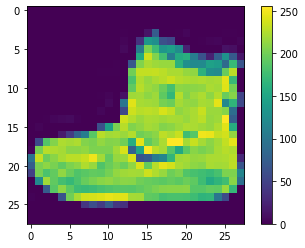

In [10]:
plt.figure() # 비어있는 그래프 생성
plt.imshow(train_images[0]) # train_image[0]은 가장 앞 이미지 데이터 하나를 가져옴
plt.colorbar()
plt.grid(False)
plt.show()

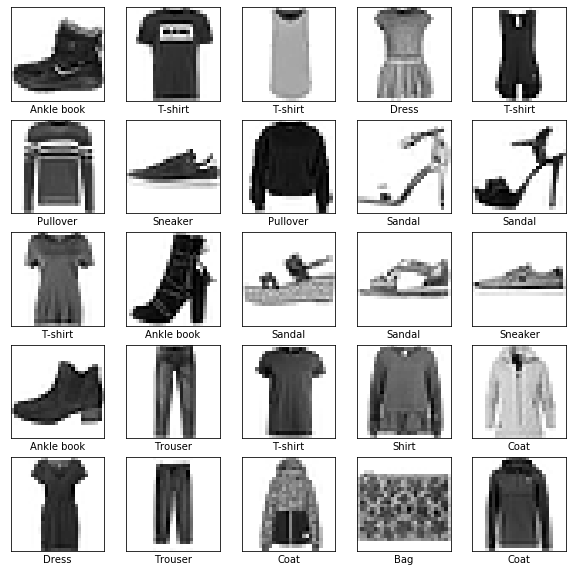

In [11]:
train_images = train_images / 255.0  # 0~255의 값을 갖는 pixel 값을 0~1의 값을 갖도록 조정.. why???
test_images = test_images / 255.0

# 훈련 set의 25개 데이터 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]) # 각 이미지의 x레이블로 해당 label을 출력함.
plt.show()

# 층 설정

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # 28*28 배열을 1차원 784 배열로 변환만 수행
    keras.layers.Dense(128, activation='relu'), # fully(densely)-connected layer
    keras.layers.Dense(10, activation='softmax') # 10개 레이블의 확률을 반환(합은 1)
])

# Model compile
## Loss function, Optimizer, Metrics
 Loss function : 훈련하는 동안 모데의 오차를 측정함. 이 함수를 최소화 해야함.  
 Optimizer : 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정.  
 Metrics(지표) : 훈련과 테스트 단계를 모니터링하기위해 사용함.  

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [16]:
model.fit(train_images, train_labels, epochs=5)
# 테스트 데이터에 대한 모델의 예측을 만듦.

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2781 - accuracy: 0.8976
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2663 - accuracy: 0.9015
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2558 - accuracy: 0.9061
Epoch 4/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2464 - accuracy: 0.9071
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2362 - accuracy: 0.9112


# 생성된 모델로 정확도 평가

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) # verbose는 진행 중 출력할 내용에 대한 옵션임.
print('\nTest accuracy :', test_acc)

10000/1 - 0s - loss: 0.2478 - accuracy: 0.8774

Test accuracy : 0.8774


In [19]:
prediction = model.predict(test_images) # 모델이 예측한 값을 prediction에 저장
prediction[0] # 첫번째 예측  : 9번 레이블이 가장 큰 숫자임을 알 수있음.

array([7.8775358e-08, 4.1911971e-07, 3.4421921e-10, 6.3138061e-10,
       9.8643493e-09, 1.5749361e-03, 1.6407456e-07, 4.2258846e-03,
       2.3327589e-09, 9.9419844e-01], dtype=float32)

In [22]:
np.argmax(prediction[0]) # np.argmax는 리스트중 가장 큰값의 인덱스를 반환

9

In [24]:
test_labels[0] # 실제 정답도 9인 것을 알 수 있음.

9